<a href="https://colab.research.google.com/github/gorzanskik-ai/intro-to-ann/blob/main/03_keras/05_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Callbacks - wywołania zwrotne (zastosowanie -> zapis wag na róznych etapach oraz pomoc w dobraniu ilości epochs)

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Dense, Flatten, Dropout

import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

np.set_printoptions(precision=12, suppress=True, linewidth=120)

Klasyfikator wieloklasowy - Digit recognition

In [20]:
(X_train, y_train), (X_test, y_test) = load_data()

In [21]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [22]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [23]:
#standaryzacja
X_train = X_train / 255.
X_test = X_test / 255.

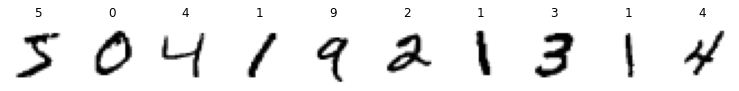

In [24]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i - 1], cmap='gray_r')
    plt.title(y_train[i - 1])
plt.show()

In [25]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',   #nie trzeba używać to_categorical żeby zakodować 0/1
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3297 - accuracy: 0.9040 - val_loss: 0.1597 - val_accuracy: 0.9555
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1601 - accuracy: 0.9524 - val_loss: 0.1203 - val_accuracy: 0.9641
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.9643 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.9714 - val_loss: 0.0931 - val_accuracy: 0.9729
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0816 - accuracy: 0.9742 - val_loss: 0.0856 - val_accuracy: 0.9752
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0675 - accuracy: 0.9787 - val_loss: 0.0825 - val_accuracy: 0.9755
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9806 - val_loss: 0.0823 - val_accuracy:

ModelCheckpoint - zapisywanie wag po poprawie modelu. Poprawa modelu -> polepszenie się metryki (accuracy)

In [28]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data


In [29]:
!pwd

/content


In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint

!mkdir model #stworzenie folderu
filepath = 'model/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [32]:
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1486/1500 [============================>.] - ETA: 0s - loss: 0.3282 - accuracy: 0.9048
Epoch 1: val_accuracy improved from -inf to 0.95383, saving model to model/weights-01-0.9538.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3267 - accuracy: 0.9051 - val_loss: 0.1626 - val_accuracy: 0.9538
Epoch 2/10
1484/1500 [============================>.] - ETA: 0s - loss: 0.1584 - accuracy: 0.9529
Epoch 2: val_accuracy improved from 0.95383 to 0.96850, saving model to model/weights-02-0.9685.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1582 - accuracy: 0.9529 - val_loss: 0.1135 - val_accuracy: 0.9685
Epoch 3/10
1487/1500 [============================>.] - ETA: 0s - loss: 0.1143 - accuracy: 0.9659
Epoch 3: val_accuracy improved from 0.96850 to 0.97017, saving model to model/weights-03-0.9702.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9660 - val_loss: 0.0958 - val_accuracy: 0.9702
Epoch 4

ModelCheckpoint - zapisanie najlepszego modelu

In [33]:
filepath = 'best_model_weights.hdf5'    #stała nazwa -> pliki będą nadpisywane lepszymi wynikami
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1495/1500 [============================>.] - ETA: 0s - loss: 0.3289 - accuracy: 0.9048
Epoch 1: val_accuracy improved from -inf to 0.95375, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3285 - accuracy: 0.9049 - val_loss: 0.1604 - val_accuracy: 0.9538
Epoch 2/10
1491/1500 [============================>.] - ETA: 0s - loss: 0.1586 - accuracy: 0.9532
Epoch 2: val_accuracy improved from 0.95375 to 0.96408, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1582 - accuracy: 0.9533 - val_loss: 0.1215 - val_accuracy: 0.9641
Epoch 3/10
1482/1500 [============================>.] - ETA: 0s - loss: 0.1161 - accuracy: 0.9647
Epoch 3: val_accuracy improved from 0.96408 to 0.96883, saving model to best_model_weights.hdf5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9647 - val_loss: 0.1073 - val_accuracy: 0.9688
Epoch 4/10
1488/1500 [

Załadowanie najlepszych wag

In [34]:
best_model = Sequential()
best_model.add(Flatten(input_shape=(28, 28)))
best_model.add(Dense(128, activation='relu'))
best_model.add(Dropout(0.2))
best_model.add(Dense(10, activation='softmax'))
best_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',   #nie trzeba używać to_categorical żeby zakodować 0/1
                metrics=['accuracy'])

best_model.load_weights('best_model_weights.hdf5')

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy)

0.9790999889373779


Early Stopping - wczesne zatrzymanie -> zatrzymanie trenowania modelu gdy metryka zacznie się pogarszać

In [36]:
model = build_model()
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3261 - accuracy: 0.9058 - val_loss: 0.1577 - val_accuracy: 0.9559
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1605 - accuracy: 0.9520 - val_loss: 0.1287 - val_accuracy: 0.9619
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1203 - accuracy: 0.9637 - val_loss: 0.0973 - val_accuracy: 0.9712
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0963 - accuracy: 0.9702 - val_loss: 0.0907 - val_accuracy: 0.9727
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0821 - accuracy: 0.9744 - val_loss: 0.0908 - val_accuracy: 0.9725
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0708 - accuracy: 0.9769 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.0804 - val_accuracy:

In [37]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.326109,0.905792,0.157675,0.955917
1,0.160507,0.952042,0.128674,0.961917
2,0.120259,0.963729,0.097307,0.971167
3,0.096340,0.970187,0.090698,0.972667
4,0.082144,0.974375,0.090848,0.972500


In [38]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['val_loss'], name='val_loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics['val_accuracy'], name='val_accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=2)
model = build_model()
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/30
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3184 - accuracy: 0.9082 - val_loss: 0.1600 - val_accuracy: 0.9537
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1579 - accuracy: 0.9535 - val_loss: 0.1155 - val_accuracy: 0.9668
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1170 - accuracy: 0.9645 - val_loss: 0.1026 - val_accuracy: 0.9705
Epoch 3: early stopping


In [40]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.318369,0.908208,0.160011,0.953667
1,0.157939,0.953458,0.115480,0.966833
2,0.116977,0.964500,0.102619,0.970500


In [41]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['val_loss'], name='val_loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics['val_accuracy'], name='val_accuracy'), row=2, col=1)
fig.update_layout(width=800)